In [1]:
# scikit learn install
# !pip install scikit-learn --user --upgrade

In [2]:
import sklearn
sklearn.__version__

'1.1.1'

# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [3]:
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
dataset = pd.read_csv('./LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [5]:
X = dataset.iloc[:, :-1].values     # 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수 - 원인)
y =  dataset.iloc[:, -1].values     # 마지막 컬럼 데이터 (종속변수 - 결과)


In [6]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()    # 객체 생성
reg.fit(X, y)       # 학습 (모델 생성)

LinearRegression()

In [8]:
y_pred = reg.predict(X)     # X 에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

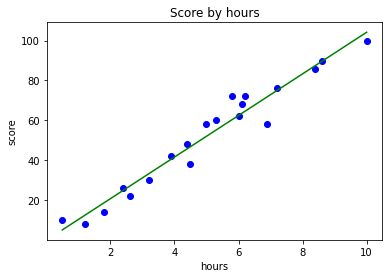

In [9]:
# 데이터 시각화
plt.scatter(X, y, color = 'blue', )     # 산점도 그래프
plt.plot(X, y_pred, color= 'green')      # 선 그래프
plt.title('Score by hours')     # 제목
plt.xlabel('hours')     # X 축 이름
plt.ylabel('score')     # Y 축 이름
plt.show()

In [10]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]]))
                                                # 2차원 배열 형태로 입력해야 함!

9시간 공부했을 때 예상 점수 :  [93.77478776]


-----------------------

# y = mx + b

In [11]:
reg.coef_   # 기울기 (m)

array([10.44369694])

In [12]:
reg.intercept_  # y절편 (b)

-0.218484702867201

> y = mx + b -> y = 10.4436x - 0.2184

----------------
# 데이터 세트 분리

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [14]:
X = dataset.iloc[:, :-1].values     # 독립변수
y = dataset.iloc[:, -1].values      # 종속변수

In [16]:
from sklearn.model_selection import train_test_split        # 튜플 형식으로 데이터가 나뉘어짐

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
                                                            # train(80) : test(20)

In [17]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [18]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [19]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [20]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [21]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [22]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

----------------
# 분리된 데이터를 통한 모델링

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [24]:
# 훈련 세트에서의 데이터를 가지고 fit
reg.fit(X_train, y_train)

LinearRegression()

### 데이터 시각화 ( 훈련 세트 )

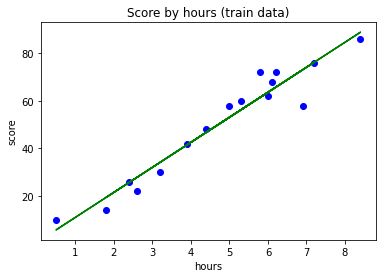

In [26]:
# 데이터 시각화
plt.scatter(X_train, y_train, color = 'blue', )     # 산점도 그래프
plt.plot(X_train, reg.predict(X_train), color= 'green')      # 선 그래프
plt.title('Score by hours (train data)')     # 제목
plt.xlabel('hours')     # X 축 이름
plt.ylabel('score')     # Y 축 이름
plt.show()

### 데이터 시각화 ( 테스트 세트 )

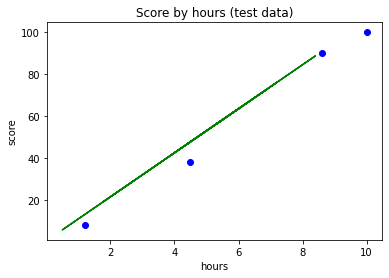

In [27]:
# 데이터 시각화
plt.scatter(X_test, y_test, color = 'blue', )     # 산점도 그래프
plt.plot(X_train, reg.predict(X_train), color= 'green')      # 선 그래프
plt.title('Score by hours (test data)')     # 제목
plt.xlabel('hours')     # X 축 이름
plt.ylabel('score')     # Y 축 이름
plt.show()

In [28]:
reg.coef_

array([10.49161294])

In [29]:
reg.intercept_

0.6115562905169796

-----------------
# 모델 평가

In [30]:
reg.score(X_test, y_test)       # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [31]:
reg.score(X_train, y_train)     # 훈련 세트를 통한 모델 평가

0.9356663661221668

## 경사하강법 (Gradient Descent)

- max_iter : 훈련 세트 반복 횟수 (epoch 횟수)
- eta0 : 학습률 (learning rate)

In [42]:
from sklearn.linear_model import SGDRegressor       # SGD : Stochastic Gradient Descent 확률적 경사 하강법

# sr = SGDRegressor(max_iter=1000, eta0=1e-3, random_state=0, verbose=1)
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

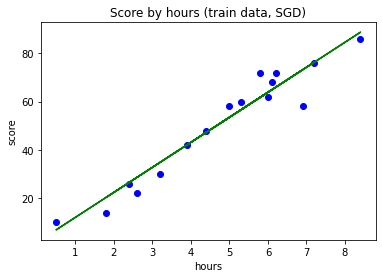

In [43]:
# 데이터 시각화
plt.scatter(X_train, y_train, color = 'blue', )     # 산점도 그래프
plt.plot(X_train, sr.predict(X_train), color= 'green')      # 선 그래프
plt.title('Score by hours (train data, SGD)')     # 제목
plt.xlabel('hours')     # X 축 이름
plt.ylabel('score')     # Y 축 이름
plt.show()

In [44]:
sr.coef_, sr.intercept_

(array([10.36273622]), array([1.67718414]))

In [45]:
sr.score(X_test, y_test)        # 테스트 세트를 통한 모델 평가

0.9696655597240635

In [46]:
sr.score(X_train, y_train)      # 훈련 세트를 통한 모델 평가

0.9351273805652945